**Reproduction of:**

**Deep Convolutional Neural Networks and Data Augmentation for Environmental  Sound Classification** 

Justin Salamon and Juan Pablo Bello

Some code taken from https://github.com/jaron/deep-listening/blob/master/4-us8k-cnn-salamon.ipynb

# Load dataset & set enviroment

In [1]:
!wget -O UrbanSound8K.tar.gz https://goo.gl/8hY5ER
!tar -xvf UrbanSound8K.tar.gz
!rm UrbanSound8K.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fold4/185909-2-0-34.wav
UrbanS

In [2]:
# get latest librosa version for audio preprocessing
!pip install --upgrade librosa

     |████████████████████████████████| 1.6MB 8.2MB/s 
  Created wheel for librosa: filename=librosa-0.7.2-cp36-none-any.whl size=1612885 sha256=451a1c5df5e4c74a4a6596ffae76ca366814bec83376781aa7aa19dbe180fa12
  Stored in directory: /root/.cache/pip/wheels/4c/6e/d7/bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [3]:
!git clone https://github.com/grudloff/Salomon2017Replication.git
!mv Salomon2017Replication/*.py .
!rm Salomon2017Replication -r

Cloning into 'Salomon2017Replication'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 116 (delta 67), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (116/116), 30.86 KiB | 501.00 KiB/s, done.
Resolving deltas: 100% (67/67), done.


In [3]:
import numpy as np
from preprocessing_multi import save_folds, load_folds 
from preprocessing_multi import load_folds
from model import build_model_multi
from evaluation import evaluate
from tensorflow.keras.callbacks import EarlyStopping
import math

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "UrbanSound8K/audio" # Where you have saved the UrbanSound8K data set"       
save_dir = "data/us8k"
load_dir = save_dir
classes = ['air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
save_folds(data_dir, save_dir)


Saving fold1
Number of samples in  fold1 :  873
Saved data/us8k/fold1_x.npy
Saved data/us8k/fold1_y.npy

Saving fold2
Number of samples in  fold2 :  888
Saved data/us8k/fold2_x.npy
Saved data/us8k/fold2_y.npy

Saving fold3
Number of samples in  fold3 :  925
Saved data/us8k/fold3_x.npy
Saved data/us8k/fold3_y.npy

Saving fold4
Number of samples in  fold4 :  990
Saved data/us8k/fold4_x.npy
Saved data/us8k/fold4_y.npy

Saving fold5
Number of samples in  fold5 :  936
Saved data/us8k/fold5_x.npy
Saved data/us8k/fold5_y.npy

Saving fold6
Number of samples in  fold6 :  823
Saved data/us8k/fold6_x.npy
Saved data/us8k/fold6_y.npy

Saving fold7
Number of samples in  fold7 :  838
Saved data/us8k/fold7_x.npy
Saved data/us8k/fold7_y.npy

Saving fold8
Number of samples in  fold8 :  806
Saved data/us8k/fold8_x.npy
Saved data/us8k/fold8_y.npy

Saving fold9
Number of samples in  fold9 :  816
Saved data/us8k/fold9_x.npy
Saved data/us8k/fold9_y.npy

Saving fold10
Number of samples in  fold10 :  837
Save

## Custom generators

In [0]:
frames = 128
bands=128
channels = 1
def random_slice(imgs, indexes):
    new_shape=(len(indexes), frames, bands, channels)
    new_imgs = np.empty(new_shape)
    for i, idx in enumerate(indexes):
        img = imgs[idx]
        L = img.shape[0]
        N = np.random.randint(0,1 + L - frames)
        new_imgs[i] = img[N:N+frames, ...]
    return new_imgs[:,np.newaxis,...]


def all_slices(img):
    N = img.shape[0]
    n_slices = N - frames + 1
    new_shape=(n_slices, frames, bands, channels)
    new_imgs = np.empty(new_shape)
    for i in range(n_slices):
        new_imgs[i] = img[i:i+frames,...]

    return new_imgs
    


In [0]:
from tensorflow.keras.utils import Sequence

class trainGenerator(Sequence):

    def __init__(self, x_set, y_set, batch_size, shuffle):
        self.x, self.y = x_set, np.array(y_set)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_x = random_slice(self.x, indexes)
        batch_y = self.y[indexes]

        return batch_x , batch_y

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
class testGenerator(Sequence):

    def __init__(self, x_set, y_set):
        self.x, self.y = x_set, np.array(y_set)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        batch_x = all_slices(np.array(self.x[idx]))
        batch_y = self.y[idx:idx+1]

        return batch_x[np.newaxis,:] , batch_y[np.newaxis,:] #

## Train

10-Fold Crossvalidation.

In [8]:


acc = np.zeros(10)
roc = np.zeros(10) 
CM=0

for f in range(1,10+1):

    # load data
    train_x, test_x, val_x, train_y, test_y, val_y = load_folds(load_dir, f)

    #train_datagen = ImageDataGenerator(preprocessing_function = random_slice)
    #test_val_datagen = ImageDataGenerator(preprocessing_function = all_slices)

    #train_data = train_datagen.flow(train_x, train_y , batch_size=100)
    #test_data = test_val_datagen.flow(test_x, test_y)
    #val_data = test_val_datagen.flow(val_x, val_y)

    train_data = trainGenerator(train_x, train_y , batch_size=100, shuffle=True)
    test_data = testGenerator(test_x, test_y)
    val_data = testGenerator(val_x, val_y)
    
    print("Building model...")
    model = build_model_multi()

    # now fit the model to the training data, evaluating loss against the validation data
    print("Training model...")
    model.fit(train_data, validation_data=test_data, 
              callbacks=[EarlyStopping(restore_best_weights=True, patience=15)],
              epochs = 200)

    # now evaluate the trained model against the unseen test data
    print("Evaluating model...")
    roc[f-1], acc[f-1], cm = evaluate(model, val_data, val_y)

    CM += cm

    #del model
    #tf.clear_session()
    #gc.collect()

    
print ('\nAverage R.O.C:', np.mean(roc))
print ('Average Accuracy:', np.mean(acc))

# using all folds: best ROC = 0.91, f-score = 0.592 (50 epochs)
# using 2 folds: average ROC = 0.792, average f-score = 0.335

# if you want to save the model, uncomment this...
#filepath = "models/salamon-cnn-model.h5"
#model.save(filepath)


*** Train on {2, 3, 5, 6, 7, 8, 9, 10} Validate on 1 Test on 4 ***
val len:  873
test len:  990
train len:  6869
Building model...
Training model...
Epoch 1/200
69/69 [==============================] - 9s 125ms/step - loss: 2.6485 - accuracy: 0.1226 - val_loss: 2.4419 - val_accuracy: 0.0747
Epoch 2/200
69/69 [==============================] - 7s 107ms/step - loss: 2.4262 - accuracy: 0.1316 - val_loss: 2.4149 - val_accuracy: 0.1313
Epoch 3/200
69/69 [==============================] - 7s 107ms/step - loss: 2.4040 - accuracy: 0.1521 - val_loss: 2.3670 - val_accuracy: 0.2141
Epoch 4/200
69/69 [==============================] - 7s 107ms/step - loss: 2.3837 - accuracy: 0.1617 - val_loss: 2.3675 - val_accuracy: 0.1717
Epoch 5/200
69/69 [==============================] - 7s 107ms/step - loss: 2.3410 - accuracy: 0.1855 - val_loss: 2.1383 - val_accuracy: 0.3404
Epoch 6/200
69/69 [==============================] - 7s 107ms/step - loss: 2.2457 - accuracy: 0.2358 - val_loss: 1.9859 - val_accuracy:

{'boxes': [<matplotlib.lines.Line2D at 0x7f9fee849d30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9fee85c780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9fee866240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9fee85ce80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9fee85c080>,
  <matplotlib.lines.Line2D at 0x7f9fee85c400>]}

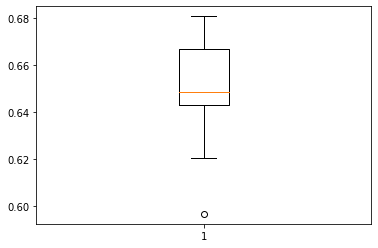

In [9]:
plt.boxplot(acc)

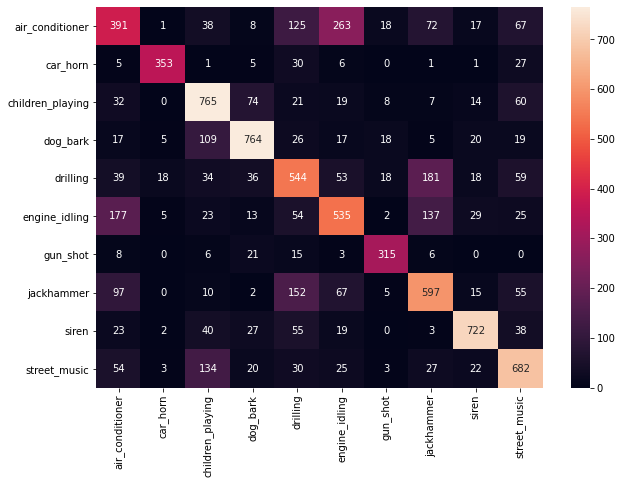

In [10]:
df_cm = pd.DataFrame(CM, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [0]:
np.save("acc_baseline.npy", acc)
np.save("cm_baseline.npy", CM)

In [0]:
acc_baseline=acc
cm_baseline=CM

In [0]:
del train_x, test_x, val_x, train_y, test_y, val_y
del train_data, test_data, val_data

In [0]:
frames = 68
bands=68
channels = 4
def random_slice(imgs, indexes):
    new_shape=(len(indexes), frames, bands, channels)
    new_imgs = np.empty(new_shape)
    for i, idx in enumerate(indexes):
        img = imgs[idx]
        L = img.shape[0]
        N = np.random.randint(0,1 + L - frames)
        new_imgs[i] = img[N:N+frames, ...]
    return new_imgs[:,np.newaxis,...]


def all_slices(img):
    N = img.shape[0]
    n_slices = N - frames + 1
    new_shape=(n_slices, frames, bands, channels)
    new_imgs = np.empty(new_shape)
    for i in range(n_slices):
        new_imgs[i] = img[i:i+frames,...]

    return new_imgs

In [0]:
from tensorflow.keras.utils import Sequence

class trainGenerator(Sequence):

    def __init__(self, x_set, y_set, batch_size, shuffle):
        self.x, self.y = x_set, np.array(y_set)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_x = random_slice(self.x, indexes)
        batch_y = self.y[indexes]

        return batch_x , batch_y

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
class testGenerator(Sequence):

    def __init__(self, x_set, y_set):
        self.x, self.y = x_set, np.array(y_set)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        batch_x = all_slices(np.array(self.x[idx]))
        batch_y = self.y[idx:idx+1]

        return batch_x[np.newaxis,:] , batch_y[np.newaxis,:] #

In [16]:
save_folds(data_dir, save_dir, frames=68, bands=68, channels=4, normalize=True, wavelet='bior1.5')


Saving fold1
Number of samples in  fold1 :  873
Saved data/us8k/fold1_x.npy
Saved data/us8k/fold1_y.npy

Saving fold2
Number of samples in  fold2 :  888
Saved data/us8k/fold2_x.npy
Saved data/us8k/fold2_y.npy

Saving fold3
Number of samples in  fold3 :  925
Saved data/us8k/fold3_x.npy
Saved data/us8k/fold3_y.npy

Saving fold4
Number of samples in  fold4 :  990
Saved data/us8k/fold4_x.npy
Saved data/us8k/fold4_y.npy

Saving fold5
Number of samples in  fold5 :  936
Saved data/us8k/fold5_x.npy
Saved data/us8k/fold5_y.npy

Saving fold6
Number of samples in  fold6 :  823
Saved data/us8k/fold6_x.npy
Saved data/us8k/fold6_y.npy

Saving fold7
Number of samples in  fold7 :  838
Saved data/us8k/fold7_x.npy
Saved data/us8k/fold7_y.npy

Saving fold8
Number of samples in  fold8 :  806
Saved data/us8k/fold8_x.npy
Saved data/us8k/fold8_y.npy

Saving fold9
Number of samples in  fold9 :  816
Saved data/us8k/fold9_x.npy
Saved data/us8k/fold9_y.npy

Saving fold10
Number of samples in  fold10 :  837
Save

In [7]:
acc = np.zeros(10)
roc = np.zeros(10) 
CM=0

for f in range(1,10+1):

    # load data
    train_x, test_x, val_x, train_y, test_y, val_y = load_folds(load_dir, f)

    train_data = trainGenerator(train_x, train_y , batch_size=100, shuffle=True)
    test_data = testGenerator(test_x, test_y)
    val_data = testGenerator(val_x, val_y)
    
    print("Building model...")
    model = build_model_multi(f_size=3 ,frames=68, bands=68, channels=4)

    # now fit the model to the training data, evaluating loss against the validation data
    print("Training model...")
    model.fit(train_data, validation_data=test_data, 
              callbacks=[EarlyStopping(restore_best_weights=True, patience=15)],
              epochs = 200)

    # now evaluate the trained model against the unseen test data
    print("Evaluating model...")
    roc[f-1], acc[f-1], cm = evaluate(model, val_data, val_y)

    CM += cm

    #del model
    #tf.clear_session()
    #gc.collect()

    
print ('\nAverage R.O.C:', np.mean(roc))
print ('Average Accuracy:', np.mean(acc))


*** Train on {3, 4, 5, 6, 7, 8, 9, 10} Validate on 1 Test on 2 ***
val len:  873
test len:  888
train len:  6971
Building model...
Training model...
Epoch 1/200
70/70 [==============================] - 4s 62ms/step - loss: 2.4275 - accuracy: 0.1313 - val_loss: 2.3634 - val_accuracy: 0.2095
Epoch 2/200
70/70 [==============================] - 4s 50ms/step - loss: 2.3731 - accuracy: 0.1635 - val_loss: 2.3282 - val_accuracy: 0.2624
Epoch 3/200
70/70 [==============================] - 3s 50ms/step - loss: 2.3497 - accuracy: 0.1793 - val_loss: 2.2848 - val_accuracy: 0.3041
Epoch 4/200
70/70 [==============================] - 4s 54ms/step - loss: 2.3051 - accuracy: 0.2038 - val_loss: 2.2354 - val_accuracy: 0.3187
Epoch 5/200
70/70 [==============================] - 4s 51ms/step - loss: 2.2490 - accuracy: 0.2368 - val_loss: 2.1673 - val_accuracy: 0.3694
Epoch 6/200
70/70 [==============================] - 4s 52ms/step - loss: 2.1805 - accuracy: 0.2705 - val_loss: 2.0903 - val_accuracy: 0.371

{'boxes': [<matplotlib.lines.Line2D at 0x7f4555ff0da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f45560077f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f45560122b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4556007ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f45560070f0>,
  <matplotlib.lines.Line2D at 0x7f4556007470>]}

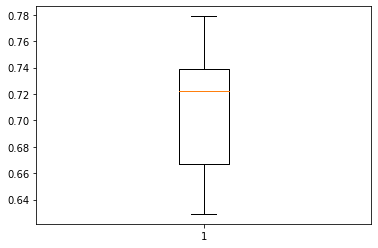

In [8]:
plt.boxplot(acc)

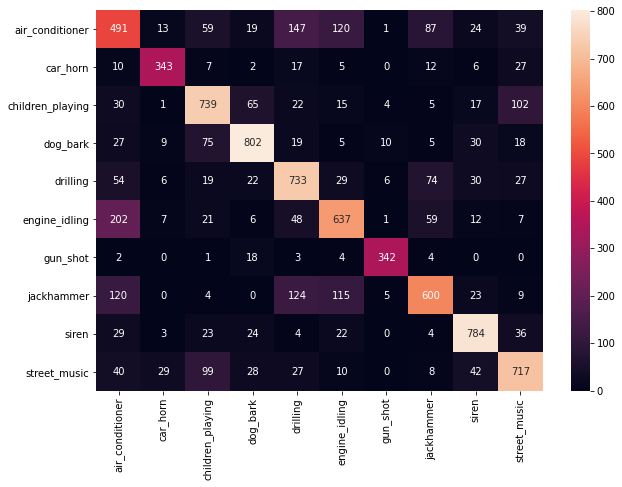

In [9]:
df_cm = pd.DataFrame(CM, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [0]:
np.save("acc_baseline.npy", acc)
np.save("cm_baseline.npy", cm)

In [0]:
acc_wavelet=acc
cm_wavelet=CM

In [0]:
from google.colab import files
files.download("acc_baseline.npy") 
files.download("cm_baseline.npy")